# Exercise 3

Exercise 3 – Clustering (3 points)
The goal of this exercise is (i) to use the collected data (text and wikidata descriptions) to automatically cluster persons first, using 2 clusters and second, using
6 clusters and (ii) to compare the results obtained when using three ways of representing text (tokens, token frequency and tf-idf) and 2 vs. 6 clusters. Your code should include the following functions:
    
• a function to train a clustering algorithm on some data using N clusters and some input representation method M (tokens, token frequency and tf-idf). Data, M and N should be parameters of that function.

• a function to compute both intrinsic (Silhouette coefficient) and extrinsic (homogeneity, completeness, v-measure, adjusted Rand index) evaluation scores for clustering results.

• a function to visualise those metrics values for each of the three input representations (tokens, token frequency and tf-id) and for 2 vs. 6 clusters (so your visualisation should display 5 scores for each of the 6 clustering results).

In [1]:
import pandas as pd
new_df = pd.read_excel("temp_data_ex3.xlsx")
new_df

,Unnamed: 0,Person,gold_type,gold_categories,clean_text,clean_description
0,87,Isaac_Newton,1,0,sir isaac newton december march was an english...,british physicist and mathematician
1,82,Albrecht_Dürer,1,0,albrecht dürer german ˈʔalbʁɛçt ˈdyːʁɐ may apr...,german painter printmaker mathematician and th...
2,78,Évariste_Galois,1,0,évariste galois french evaʁist ɡalwa october m...,french mathematician
3,79,Carl_Friedrich_Gauss,1,0,johann carl friedrich gauss german gauß ˈkaʁl ...,german mathematician and physicist
4,80,Gerardus_Mercator,1,0,gerardus mercator march december was a geograp...,dutch cartographer philosopher and mathematician
...,...,...,...,...,...,...
121,33,Michael_Bloomberg,0,5,michael rubens bloomberg born february is an a...,american businessman and politician former may...
122,34,Ezra_Klein,0,5,ezra klein born may is an american journalist ...,american journalist
123,37,Victor_Hugo,0,5,hugo french viktɔʁ maʁi yɡo listen ventôse yea...,french poet novelist and dramatist
124,42,Bill_Maher,0,5,william maher born january is an american come...,american comedian and television host


In [2]:
# shuffle data 
new_df = new_df.sample(frac = 1)
X = new_df['clean_text'] # dont know how to add table 'gold_descriptions'


,Unnamed: 0,Person,gold_type,gold_categories,clean_text,clean_description,predicted
90,4,Louis_Armstrong,0,4,louis daniel armstrong august july nicknamed s...,american jazz trumpeter composer and singer,1
109,39,Stendhal,0,5,beyle french bɛl january march better known by...,century french writer,0
95,22,Elvis_Presley,0,4,elvis aaron presley january august also known ...,american singer and actor,1
75,108,Carlos_Ibáñez_del_Campo,1,3,general carlos ibáñez del campo american spani...,chilean army officer and political figure,1
98,7,Renaud,0,4,groupe renault uk us french ɡʁup ʁəno also kno...,french singer songwriter and actor,0
...,...,...,...,...,...,...,...
50,52,Manoel_da_Costa_Ataíde,0,2,manoel da costa ataíde better known as mestre ...,brazilian painter sculptor gilder and teacher,0
46,60,Konstantin_Melnikov,0,2,konstantin stepanovich melnikov russian конста...,russian architect and painter,1
77,119,Nicolas_Sarkozy,1,3,nicolas paul stéphane sarközy de french nikɔla...,president of the french republic,0
119,31,Jean_Racine,0,5,jean racine us also baptized racine french bat...,french dramatist,0


In [53]:
import nltk
from nltk import word_tokenize
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import CountVectorizer
"""
# N clusters
# M method (tokens, token frequency and tf-idf)
# method = ['tf_idf','tokens','token_frequency']
"""

# def clustering(data,method,num_clus):
def clustering(data,N,method = 'tf_idf'):
    if method == 'tf_idf':
        
        #Create a TFIDF vectorizer to convert convert words to vectors
        tfidf_vectorizer = TfidfVectorizer(max_features=8000, use_idf=True,stop_words='english', tokenizer=nltk.word_tokenize)
        # Apply the vectorizer to the input texts (X)
        tfidf_matrix = tfidf_vectorizer.fit_transform(data)
        # Create a KMeans clustering model
        km = KMeans(n_clusters=N, init='k-means++', max_iter=300, n_init=7, verbose=0, random_state=3425)
        # Apply the clustering model on the tf-idf matrix (the features)
        km.fit(tfidf_matrix)
        pred = km.labels_ 
        new_df['predicted'] = pred 
        return new_df
    
    elif method == 'tokens':
        print('in progress...') # need to do this 
        
    elif method == 'token_frequency':
        count_vectorizer = CountVectorizer(ngram_range=(1,1)) # default unigram model
        # Convert documents to a matrix of frequency counts
        X_freq = count_vectorizer.fit_transform(X)
        km = KMeans(n_clusters=N, init='k-means++', max_iter=300, n_init=7, verbose=0, random_state=3425)
        # Apply the clustering model on the tf matrix (the features)
        km.fit(X_freq)
        pred = km.labels_ 
        new_df['predicted'] = pred 
        return new_df
    
    else: 
        print('invalid method')

cluster = clustering(X,2,'tf_idf')
# cluster = clustering(X,6,'token_frequency')
cluster

,Unnamed: 0,Person,gold_type,gold_categories,clean_text,clean_description,predicted
90,4,Louis_Armstrong,0,4,louis daniel armstrong august july nicknamed s...,american jazz trumpeter composer and singer,1
109,39,Stendhal,0,5,beyle french bɛl january march better known by...,century french writer,0
95,22,Elvis_Presley,0,4,elvis aaron presley january august also known ...,american singer and actor,1
75,108,Carlos_Ibáñez_del_Campo,1,3,general carlos ibáñez del campo american spani...,chilean army officer and political figure,1
98,7,Renaud,0,4,groupe renault uk us french ɡʁup ʁəno also kno...,french singer songwriter and actor,0
...,...,...,...,...,...,...,...
50,52,Manoel_da_Costa_Ataíde,0,2,manoel da costa ataíde better known as mestre ...,brazilian painter sculptor gilder and teacher,0
46,60,Konstantin_Melnikov,0,2,konstantin stepanovich melnikov russian конста...,russian architect and painter,1
77,119,Nicolas_Sarkozy,1,3,nicolas paul stéphane sarközy de french nikɔla...,president of the french republic,0
119,31,Jean_Racine,0,5,jean racine us also baptized racine french bat...,french dramatist,0


In [54]:
# Print out number of items per clusters
new_df['predicted'].value_counts()

1    66
0    60
Name: predicted, dtype: int64

In [55]:
clusters=new_df['predicted'].tolist()
# clusters

In [58]:
 #Create a TFIDF vectorizer to convert convert words to vectors
tfidf_vectorizer = TfidfVectorizer(max_features=8000, use_idf=True,stop_words='english', tokenizer=nltk.word_tokenize)
# Apply the vectorizer to the input texts (X)
tfidf_matrix = tfidf_vectorizer.fit_transform(X)
# print(tfidf_matrix)


In [ ]:

count_vectorizer = CountVectorizer(ngram_range=(1,1)) # default unigram model
# Convert documents to a matrix of frequency counts
X_freq = count_vectorizer.fit_transform(X)

In [61]:
from sklearn import metrics

# labels = cluster['gold_categories']
def clustering_evaluation(labels,predicted,method = 'tf_idf' ):
#     labels = gold

    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, predicted))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, predicted))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, predicted))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, predicted))
    if method == 'tf_idf':
        print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(tfidf_matrix, predicted, sample_size=1000))
    elif method == 'tokens':
        print('in progress...') # need to do this 
        
    elif method == 'token_frequency':
        print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_freq, predicted, sample_size=1000))
    else: 
        print('No Silhouette Coefficient due to invalid method')
    
clustering_evaluation(cluster['gold_categories'],cluster['predicted'])

Homogeneity: 0.136
Completeness: 0.348
V-measure: 0.196
Adjusted Rand-Index: 0.139
No Silhouette Coefficient due to invalid method


+ Visualization of tfidf

In [8]:
# def clustering_visualization():
#     pass
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array 

MDS()

# n_components=2 to plot results in a two-dimensional plane
# "precomputed" because the  distance matrix dist is already computed
# `random_state` set to 1 so that the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [15]:
#set up colors per clusters using a dict
# #1b9e77 (green) #d95f02 (orange) #7570b3 (purple) #e7298a (pink)
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#FF5733',5:'#000000'}

#set up cluster names using a dict

cluster_name = {'architects': 0, 
                 'mathematicians': 1, 
                 'painters': 2, 
                 'politicians': 3, 
                 'singers': 4, 
                 'writers': 5}


cluster_names = {v:k for k,v in cluster_name.items() }

cluster_names

{0: 'architects',
 1: 'mathematicians',
 2: 'painters',
 3: 'politicians',
 4: 'singers',
 5: 'writers'}

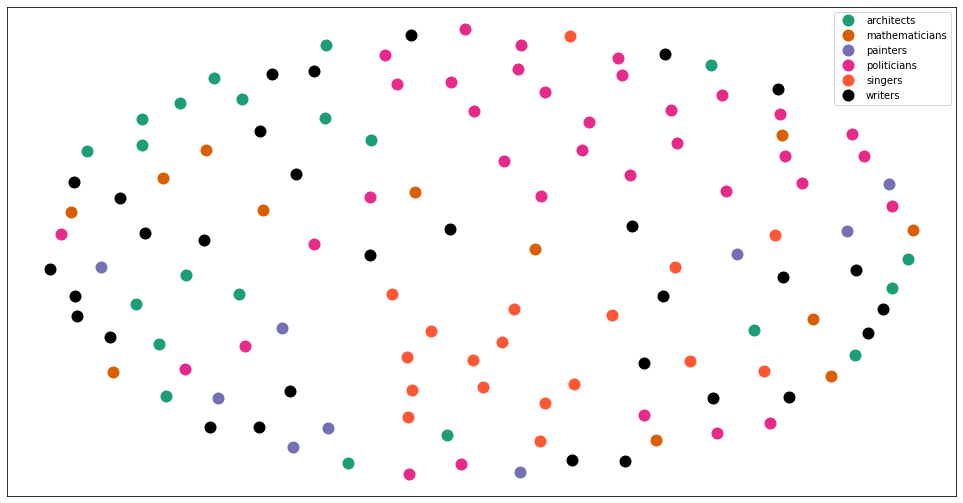

In [10]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], 
            color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point
    
    
plt.show() #show the plot

+ tokens frequency visualization

# Exercise 4

Exercise 4 – Classifying (4 points)
Since you know which category and subcategory each person in your dataset belongs to, you can also learn a classifier and check how well it can predict the category and subcategory a person in your dataset belongs to.
Your code should include:
    

    4.1 a function which outputs accuracy, a confusion matrix, precision, recall and F1 for the results of your classification (when classifying into categories and when classifying into subcategories)

    4.2 a function which outputs a visualisation of the accuracy of your classifier per category and per subcategories

4.1

In [17]:
#     Vectorizing the input texts
# Defining X and Y
Y = new_df['gold_categories']
X = new_df['clean_text']

In [18]:
# Create train and test data
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [32]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
# Create a TFIDF vectorizer to convert convert words to vectors
tfidf_vectorizer = TfidfVectorizer(max_features=9000, use_idf=True,stop_words='english', tokenizer=nltk.word_tokenize)
# Apply the vectorizer to the input texts (X)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_matrix_test = tfidf_vectorizer.transform(X_test)


In [33]:
tfidf_matrix_test.shape
tfidf_matrix_train.shape
len(tfidf_vectorizer.vocabulary_ )

9000

In [36]:
# len(tfidf_vectorizer.get_feature_names() )

In [37]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a Perceptron object
clf = Perceptron()

# Train the model on the training data
clf.fit(tfidf_matrix_train,Y_train)

# Test the model on the test data
prediction = clf.predict(tfidf_matrix_test)
# Print out the expected values and the predictions
print("expected values: {},predictions:{}".format(Y_test,list(prediction)))

# Print accuracy
print("accuracy:{}".format(accuracy_score(Y_test,prediction)))

expected values: 11     0
58     3
101    5
38     1
16     0
40     1
102    5
17     0
60     3
97     4
98     4
27     1
94     4
113    5
48     2
19     0
69     3
2      0
114    5
45     2
37     1
72     3
104    5
90     4
20     0
103    5
Name: gold_categories, dtype: int64,predictions:[0, 3, 5, 5, 0, 1, 5, 0, 3, 4, 1, 1, 4, 3, 0, 0, 2, 0, 5, 2, 1, 3, 5, 4, 0, 0]
accuracy:0.7692307692307693


In [38]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.75      0.75      0.75         4
           2       0.50      0.50      0.50         2
           3       0.75      0.75      0.75         4
           4       1.00      0.75      0.86         4
           5       0.80      0.67      0.73         6

    accuracy                           0.77        26
   macro avg       0.76      0.74      0.74        26
weighted avg       0.78      0.77      0.77        26



In [ ]:
# def classifier():
#     pass

4.2

In [ ]:
# def visual_classifier():
#     pass

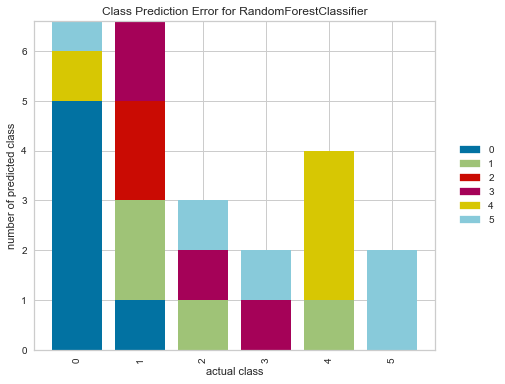

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [64]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

classes = [0, 1, 2, 3, 4, 5]

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(tfidf_matrix_train, Y_train)

# Evaluate the model on the test data
visualizer.score(tfidf_matrix_test, Y_test)

# Draw visualization
visualizer.show()